# Tarea semana 4

Este jupyter está basado en el proyecto del siguiente link: https://github.com/1adrianb/face-alignment, donde se ve que aplican todo lo que es la parte de la alinación 2D y 3D.

Este primer codigo importa un algoritmo que permite encontrar los puntos faciales basicos, ubicados en la boca, los ojos, etc. de un rostro encontrado en la imagen que ingresemos, para luego aplicar el SVR el cual es un regresor lineal que permite aproximar la posición de otros 67 puntos faciales para tener una mejor representación del rostro. Luego importa skimage que es una libreria utíl para el manejo de imagenes de las cuales queramos aplicar el algoritmo.


In [14]:
import face_alignment #Algoritmo que encuentra los distintos puntos faciales.
from skimage import io #manejo de imagenes jpg.

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)

input = io.imread('C:/Users/Javier Valladares/Desktop/archivos semestre 2019/Modelacion/3D alignment/face-alignment-master/face-alignment-master/test/assets/Fiesta.jpg')
preds = fa.get_landmarks(input)

Este segundo codigo es similar al primero, pero en vez de aplicar el algoritmo que busca los puntos faciales a una imagen, este codigo permite hacerlo para una carpeta de imagenes.

In [33]:
import face_alignment #Algoritmo que encuentra los distintos puntos faciales.
from skimage import io #manejo de imagenes jpg.

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)

preds = fa.get_landmarks_from_directory('C:/Users/Javier Valladares/Desktop/archivos semestre 2019/Modelacion/3D alignment/face-alignment-master/face-alignment-master/test/assets/')

100%|██████████| 7/7 [00:03<00:00,  2.21it/s]


Este ultimo codigo recopila toda la información obtenida para una imagen y utilizando librerías para graficar en 2D y 3D, grafica los puntos obtenidos, tanto los 6 puntos principale que se obtienen en primera instancia como los otros 67 obtenidos por el SVR.

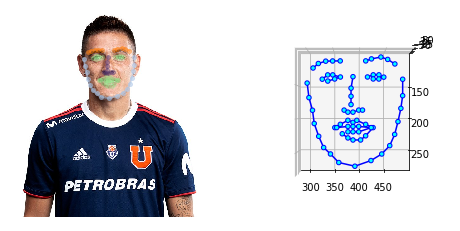

In [38]:
import face_alignment #Algoritmo que encuentra los distintos puntos faciales.
import matplotlib.pyplot as plt #Librería para graficar datos.
from mpl_toolkits.mplot3d import Axes3D #Librería que permite hacer graficos 3D.
from skimage import io #manejo de imagenes jpg.
import collections #librería para el manejo de tuplas.


# Este línea de codigo se encarga de la alineación 3D.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cpu', flip_input=True)

name = 'matigol' #Nombre de la iamgen a estudiar

try:
    input_img = io.imread('C:/Users/Javier Valladares/Desktop/archivos semestre 2019/Modelacion/3D alignment/face-alignment-master/face-alignment-master/test/assets/'+name+'.jpg')
except FileNotFoundError:
    input_img = io.imread('test/assets/'+name+'.jpg')

preds = fa.get_landmarks(input_img)[-1]

# 2D-Plot
plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input_img)

for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0],
            preds[pred_type.slice, 1],
            color=pred_type.color, **plot_style)

ax.axis('off')

# 3D-Plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.scatter(preds[:, 0] * 1.2,
                  preds[:, 1],
                  preds[:, 2],
                  c='cyan',
                  alpha=1.0,
                  edgecolor='b')

for pred_type in pred_types.values():
    ax.plot3D(preds[pred_type.slice, 0] * 1.2,
              preds[pred_type.slice, 1],
              preds[pred_type.slice, 2], color='blue')

ax.view_init(elev=90., azim=90.)
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()